In [2]:

# All files needed
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import chi2

import sys 
# Set path to the python file
sys.path.append('Path to Argon folder Heere')
import ArAr_Naumenko_Dezes_Test

In [3]:
# Draw ellipse function
def draw_ellipse(mean, cov, ax, edgecolor='black',
                 facecolor='none', alpha=1, zorder=2, 
                 lw = 2):
    
    # Compute eigenvalues and eigenvectors
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    
    # Calculate ellipse width and height using a 95% confidence interval
    width, height = 2 * np.sqrt(np.abs(vals) * chi2.ppf(0.95, 2))
    
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta,
                      edgecolor=edgecolor, facecolor=facecolor, alpha=alpha, zorder=zorder, lw =lw)
    ax.add_patch(ellipse)
    return ellipse

In [4]:
Calibrations = ['BayesCal', 'Min2000', 'Renne2011', 'SJ']

In [5]:
# Loop through the code and get means and covariances for the ellipse plots
means = []
covs = []
for i in range(4): 
    inst = ArAr_Naumenko_Dezes_Test.ArAr_Naumenko_Dezes_Test(
               sample_name=Calibrations[i], 
               Calibration=Calibrations[i]
           )
    mean_, cov_ = inst.Covariances_and_Means()
    means.append(mean_) 
    covs.append(cov_)     

# Convert to array
means = np.array(means)  # Shape: (4, 2)
covs = np.array(covs)    # Shape: (4, 2, 2)

##rint("Means array:\n", means)
#print("Covariances array:\n", covs)

In [7]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14

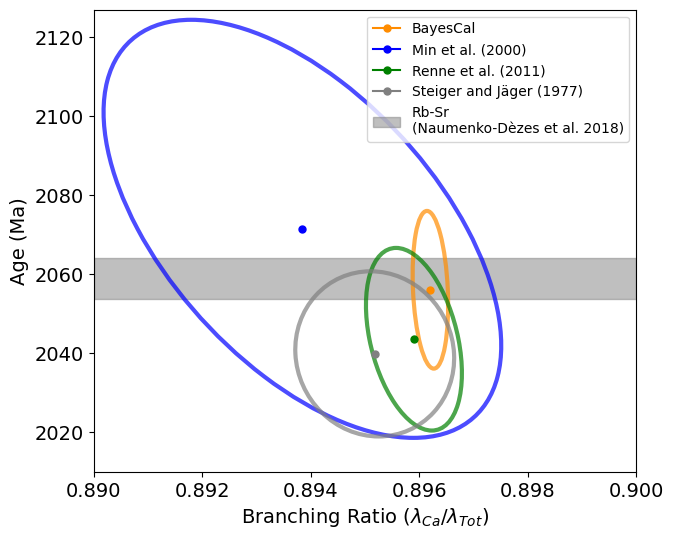

In [11]:

labels = ['BayesCal', 'Min et al. (2000)', 'Renne et al. (2011)', 
         'Steiger and Jäger (1977)']
# Define colors for each ellipse
colors = ['darkorange', 'b', 'g', 'grey']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Draw each ellipse and mark its center
for i in range(4):
    draw_ellipse(means[i], covs[i], ax=ax, edgecolor=colors[i], facecolor='none', 
                 alpha=0.7, zorder=2, lw = 3)
    ax.plot(means[i, 0], means[i, 1], marker='o', color=colors[i], markersize=5, 
           label = labels[i])

# Set axis limits. The x-axis values are around 2e9 and y-axis values near 0.9.
ax.set_ylim(2.01e3, 2.127e3)
ax.set_xlim(0.89, 0.90)
ax.set_xlabel("Branching Ratio ($\lambda_{Ca}$/$\lambda_{Tot}$)")
ax.set_ylabel("Age (Ma)")


ax.axhspan(2058.9 - 5.2, 2058.9 + 5.2, color = 'grey', 
           alpha  = 0.5, 
          label = 'Rb-Sr\n(Naumenko-Dèzes et al. 2018)')


ax.legend(fontsize = 10)
